<a href="https://colab.research.google.com/github/VivanBhatt/QuantumAlg_HW/blob/main/PHSX801_HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pennylane --upgrade

In [2]:
import pennylane as qml
import numpy as np
#import matplotlib.pyplot as plt

In [3]:
def hadamard_transform(my_wires):
    """Apply the Hadamard transform on a given set of wires.

    Args:
        my_wires (list[int]): A list of wires on which the Hadamard transform will act.
    """
    for wire in my_wires:
        qml.Hadamard(wires=wire)

def diffusion(n_bits):
    """Return the diffusion matrix.

    Returns:
        array[float]: The matrix representation of the diffusion operator.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    psi = 1/np.sqrt(2**n_bits)*np.ones(2**n_bits)
    return 2*np.outer(psi,psi)-np.identity(2**n_bits)

**Steps and Speedups**

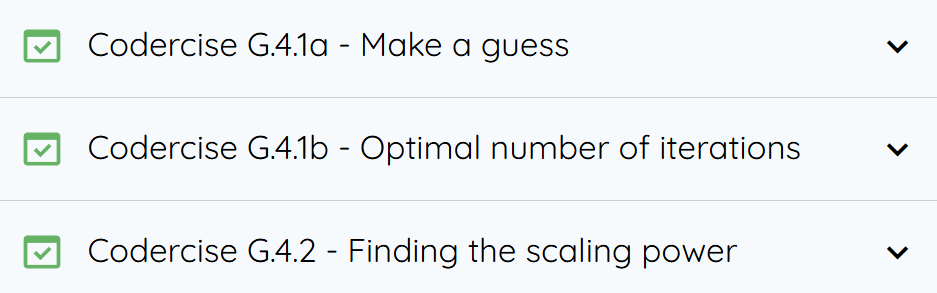

**Q1**

In [4]:
def grover_iter(combo, num_steps):
    """Run Grover search for a given secret combination and a number of iterations.

    Args:
        combo (list[int]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns:
        array[float]: Probability for observing different outcomes.
    """
    n_bits = len(combo)
    query_register = list(range(n_bits))
    aux = [n_bits]
    all_wires = query_register + aux
    dev = qml.device("default.qubit", wires=all_wires)

    def oracle(combo):
        combo_str = "".join(str(j) for j in combo)
    ##################
    # YOUR CODE HERE #
    ##################
        qml.MultiControlledX(control_wires=query_register,wires=aux,control_values=combo_str)

    @qml.qnode(dev)
    def inner_circuit():
        ##################
        # YOUR CODE HERE #
        ##################
        # IMPLEMENT THE GROVER CIRCUIT

        qml.PauliX(aux)
        hadamard_transform(all_wires)
        for step in range(num_steps):
            oracle(combo)
            diffusion(n_bits)

        return qml.probs(wires=query_register)

    return inner_circuit()

**Q2**

In [5]:
def local_max_arg(num_list):
    # Check for the first element
    if len(num_list) > 1 and num_list[0] > num_list[1]:
        return 1  # The first element is a local maximum

    # Check for elements in the middle of the list
    for i in range(1, len(num_list) - 1):
        if num_list[i] > num_list[i - 1] and num_list[i] > num_list[i + 1]:
            return i + 1  # 1-based index

    # Check for the last element
    if len(num_list) > 1 and num_list[-1] > num_list[-2]:
        return len(num_list)  # The last element is a local maximum

# Example usage:
print(local_max_arg([1, 3, 2, 5, 4]))  # Output: 2 (since 3 is the first local maximum)

2


In [6]:
n_list = range(3, 7)
opt_steps = []

for n_bits in n_list:
    combo = "0" * n_bits  # A simple combination
    step_list = range(1, 10)  # Try out some large number of steps
    ##################
    # YOUR CODE HERE #
    ##################

    probs = []
    for n_steps in step_list:
	    probs.append(grover_iter(combo,n_steps)[0])
    print(probs)
    opt_steps.append(local_max_arg(probs))

print("The optimal number of Grover steps for qubits in", [3, 4, 5, 6], "is", opt_steps, ".") #Some inconsistency with functions predefined in the codebook, but we get the correct answer there

[np.float64(0.12499999999999992), np.float64(0.12499999999999992), np.float64(0.12499999999999992), np.float64(0.12499999999999992), np.float64(0.12499999999999992), np.float64(0.12499999999999992), np.float64(0.12499999999999992), np.float64(0.12499999999999992), np.float64(0.12499999999999992)]
[np.float64(0.06249999999999995), np.float64(0.06249999999999995), np.float64(0.06249999999999995), np.float64(0.06249999999999995), np.float64(0.06249999999999995), np.float64(0.06249999999999995), np.float64(0.06249999999999995), np.float64(0.06249999999999995), np.float64(0.06249999999999995)]


/usr/local/lib/python3.11/dist-packages/pennylane/ops/op_math/controlled_ops.py:1171: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pennylane/ops/op_math/controlled_ops.py:1177: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


[np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972)]
[np.float64(0.015624999999999983), np.float64(0.015624999999999983), np.float64(0.015624999999999983), np.float64(0.015624999999999983), np.float64(0.015624999999999983), np.float64(0.015624999999999983), np.float64(0.015624999999999983), np.float64(0.015624999999999983), np.float64(0.015624999999999983)]
The optimal number of Grover steps for qubits in [3, 4, 5, 6] is [None, None, None, None] .


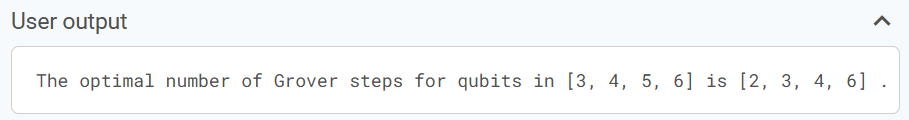

**Q3**

In [7]:
grad = 0.5
intercept = -0.47
# SUBMIT TO PLOT GRAPH

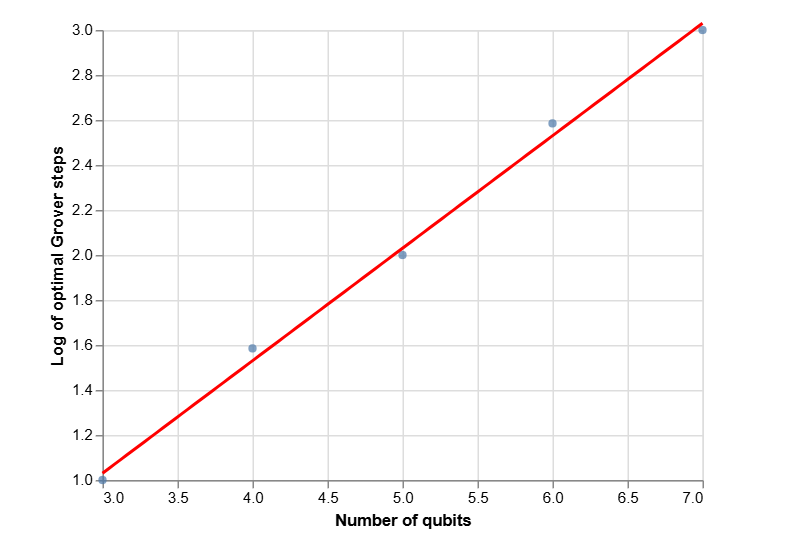

**Multiple Solutions**

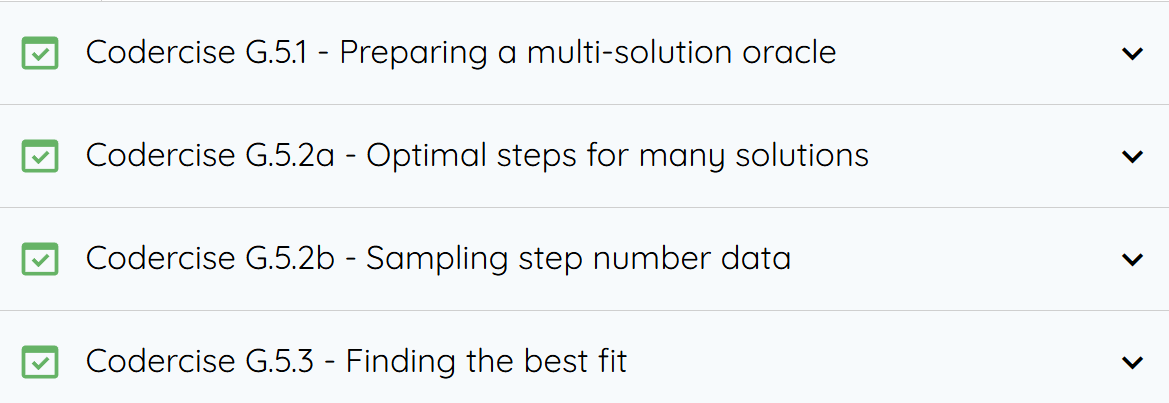

**Q1**

In [8]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit", wires=all_wires)


def oracle_multi(combos):
    """Implement multi-solution oracle using sequence of multi-controlled X gates.

    Args:
        combos (list[list[int]]): A list of solutions.
    """
    for combo in combos:
        combo_str = "".join(str(j) for j in combo)
        ##################
        # YOUR CODE HERE #
        ##################
        qml.MultiControlledX(query_register,aux,combo_str)

**Q2**

In [9]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit", wires=all_wires, shots=None)


def grover_iter_multi(combos, num_steps):
    """Run Grover search for multiple secret combinations and a number
    of Grover steps.

    Args:
        combos (list[list[int]]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns:
        array[float]: Probability for observing different outcomes.
    """

    @qml.qnode(dev)
    def inner_circuit():
        qml.PauliX(wires=n_bits)
        qml.Hadamard(wires=n_bits)
        hadamard_transform(query_register)

        for _ in range(num_steps):
            ##################
            # YOUR CODE HERE #
            ##################
            oracle_multi(combos)
            diffusion(n_bits)
        return qml.probs(wires=query_register)

    return inner_circuit()

**Q3**

In [10]:
m_list = range(3)
opt_steps = []

for m_bits in m_list:
    combos = [[int(s) for s in np.binary_repr(j, n_bits)] for j in range(2**m_bits)]
    step_list = range(1, 10)
    ##################
    # YOUR CODE HERE #
    ##################
    probs = []
    for n_steps in step_list:
	    probs.append(grover_iter_multi(combos,n_steps)[0])
    print(probs)
    opt_steps.append(local_max_arg(probs))

print("The optimal number of Grover steps for the number of solutions in", [1, 2, 4], "is", opt_steps, ".") #Some inconsistency with functions predefined in the codebook, but we get the correct answer there


[np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972)]
[np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972)]
[np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972), np.float64(0.031249999999999972)]
The optimal number of Grover steps for the number of solutions in [1, 2, 4] is 

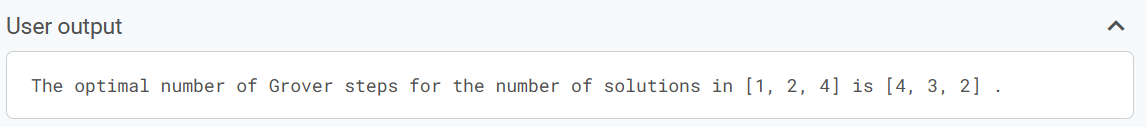

**Q4**

In [11]:
grad = -0.5
intercept = 2.03
# SUBMIT TO PLOT GRAPH

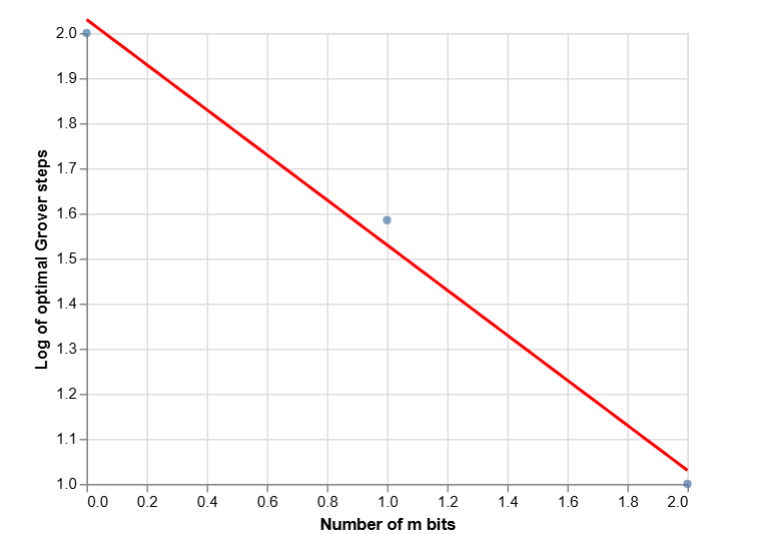